# Trading View Extract

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('BINANCE_SOLUSDT.P, 60_e652a.csv')

# Dropping rows
drop_columns = ['Plot','Plot.1']
df = df.drop(columns=drop_columns)

nan_columns = ['Leading Span A', 'Leading Span B']
df = df.dropna(subset=nan_columns, how='all')

# Display the first few rows of the DataFrame
df

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752
...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585


# Snipet Visualization

In [2]:
df_tail = df.tail(200)
df_tail

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
25776,1733788800,216.66,221.02,213.58,217.74,237.3525,238.610,NaN,226.020359
25777,1733792400,217.75,219.42,215.80,218.94,236.4425,238.450,NaN,226.020359
25778,1733796000,218.94,218.97,212.84,212.92,235.8375,237.845,NaN,226.020359
25779,1733799600,212.91,215.86,206.95,215.83,235.4975,237.505,NaN,226.020359
25780,1733803200,215.83,216.43,212.20,216.14,235.1125,237.120,NaN,226.020359
...,...,...,...,...,...,...,...,...,...
25971,1734490800,218.61,218.98,217.01,217.43,217.7600,219.280,216.687782,NaN
25972,1734494400,217.42,217.90,215.35,217.10,217.4225,219.280,216.687782,NaN
25973,1734498000,217.09,218.20,215.21,215.67,216.2650,219.280,NaN,226.664539
25974,1734501600,215.67,216.46,213.36,215.31,216.2650,219.280,NaN,224.803585


/tmp/ipykernel_324971/1631992749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tail['time'] = pd.to_datetime(df_tail['time'], unit='s')  # Convert Unix timestamp to datetime


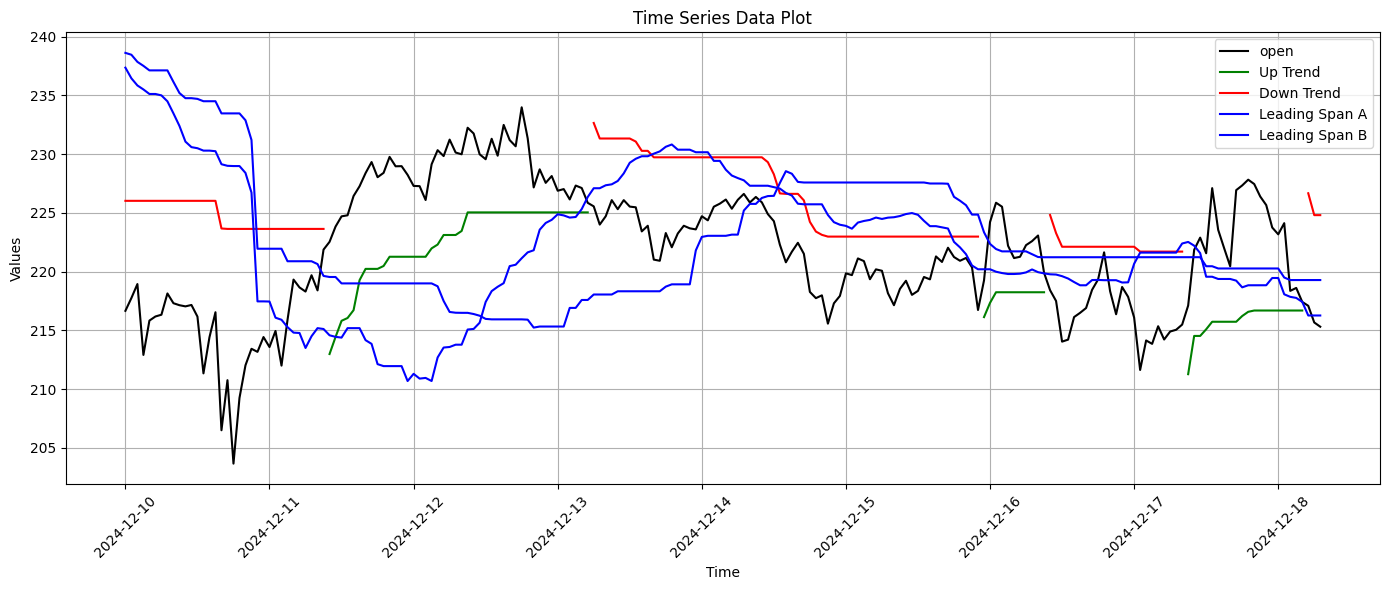

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_tail is a pandas DataFrame
df_tail['time'] = pd.to_datetime(df_tail['time'], unit='s')  # Convert Unix timestamp to datetime

# Define custom colors for specific series
color_map = {
    'open': 'black',
    'Up Trend': 'green',
    'Down Trend': 'red',
    'Leading Span A': 'blue',
    'Leading Span B': 'blue'
}

# Plotting all columns except 'high' and 'low'
plt.figure(figsize=(14, 6))

for column in ['open', 'Up Trend', 'Down Trend', 'Leading Span A', 'Leading Span B']:
    if column in color_map:
        plt.plot(df_tail['time'], df_tail[column], label=column, color=color_map[column])
    else:
        plt.plot(df_tail['time'], df_tail[column], label=column)  # Default color for other series

plt.title('Time Series Data Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df_head = df.head(200)
df_head

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
50,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966
51,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169
52,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752
53,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752
54,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752
...,...,...,...,...,...,...,...,...,...
245,1641877200,136.55,136.59,135.01,135.63,141.9675,140.435,NaN,140.062012
246,1641880800,135.62,136.75,135.40,136.72,141.5350,140.435,NaN,140.062012
247,1641884400,136.72,137.32,136.20,137.20,141.4375,140.435,NaN,140.062012
248,1641888000,137.21,138.38,136.08,136.41,141.4975,140.435,NaN,140.062012


/tmp/ipykernel_324971/2973937375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['time'] = pd.to_datetime(df_head['time'], unit='s')  # Convert Unix timestamp to datetime


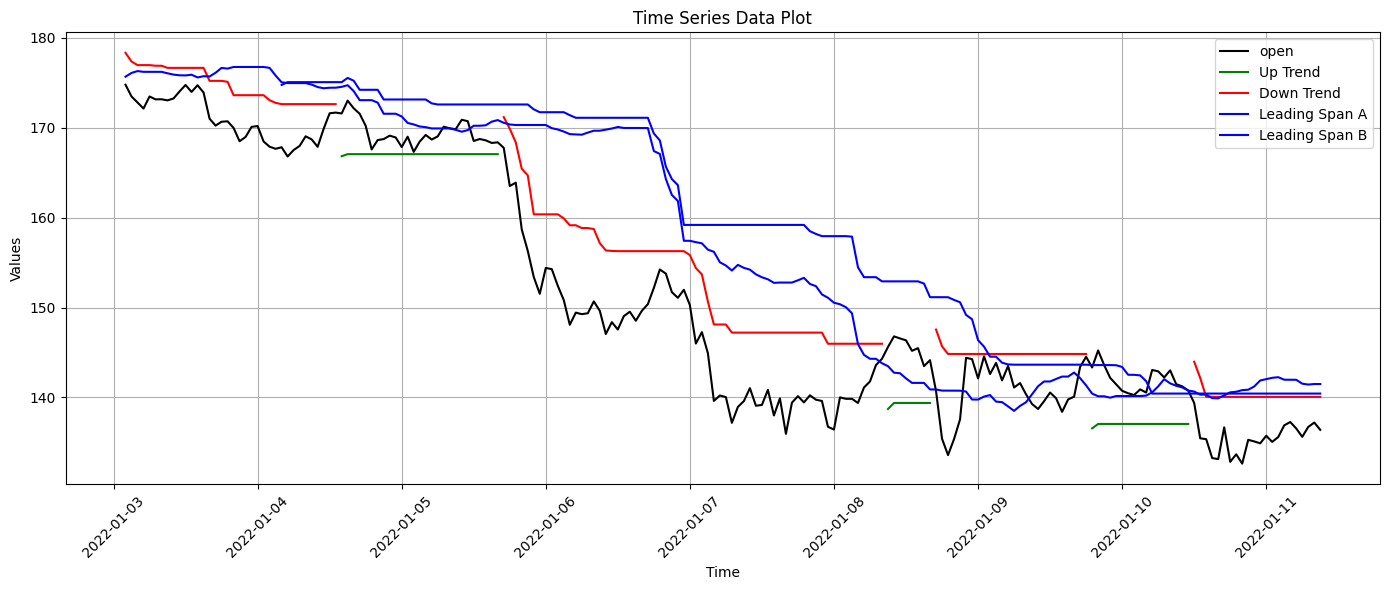

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_tail is a pandas DataFrame
df_head['time'] = pd.to_datetime(df_head['time'], unit='s')  # Convert Unix timestamp to datetime

# Define custom colors for specific series
color_map = {
    'open': 'black',
    'Up Trend': 'green',
    'Down Trend': 'red',
    'Leading Span A': 'blue',
    'Leading Span B': 'blue'
}

# Plotting all columns except 'high' and 'low'
plt.figure(figsize=(14, 6))

for column in ['open', 'Up Trend', 'Down Trend', 'Leading Span A', 'Leading Span B']:
    if column in color_map:
        plt.plot(df_head['time'], df_head[column], label=column, color=color_map[column])
    else:
        plt.plot(df_head['time'], df_head[column], label=column)  # Default color for other series

plt.title('Time Series Data Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Backtest Signaling

In [5]:
df_backtest = df.copy()
df_backtest.reset_index(drop=True,inplace=True)
df_backtest

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend
0,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966
1,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169
2,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752
3,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752
4,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752
...,...,...,...,...,...,...,...,...,...
25921,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN
25922,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN
25923,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539
25924,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585


In [6]:
import numpy as np

# Set 'super_trend' to 1 if 'Down Trend' is NaN, and to 0 if 'Up Trend' is NaN
df_backtest['super_trend'] = np.where(df_backtest['Down Trend'].isna(), 1, 
                                      np.where(df_backtest['Up Trend'].isna(), -1, np.nan))

# Define a function to determine the action suggestion for each row
def determine_criteria_pass(row):
    if row['super_trend'] == 1 and row['open'] > max(row['Leading Span A'], row['Leading Span B']):
        return 1
    elif row['super_trend'] == -1 and row['open'] < min(row['Leading Span A'], row['Leading Span B']):
        return 1
    return 0

# Apply the function row-wise to the DataFrame
df_backtest['criteria'] = df_backtest.apply(determine_criteria_pass, axis=1)

# Initialize 'action' column to None
df_backtest['action'] = None

# Assign 'long' where super_trend == 1 and criteria == 1
df_backtest['action'] = np.where(
    (df_backtest['super_trend'] == 1) & (df_backtest['criteria'] == 1),
    'long',
    df_backtest['action']
)

# Assign 'short' where super_trend == -1 and criteria == 1
df_backtest['action'] = np.where(
    (df_backtest['super_trend'] == -1) & (df_backtest['criteria'] == 1),
    'short',
    df_backtest['action']
)

# Assign 'close' where super_trend changes (shifted value not equal to current value)
df_backtest['trend_change'] = np.where(
    df_backtest['super_trend'].shift(1) != df_backtest['super_trend'],
    1,
    0
)

df_backtest

,time,open,high,low,close,Leading Span A,Leading Span B,Up Trend,Down Trend,super_trend,criteria,action,trend_change
0,1641175200,174.80,174.80,173.23,173.50,175.6975,NaN,NaN,178.342966,-1.0,1,short,1
1,1641178800,173.49,173.81,172.18,172.82,176.1100,NaN,NaN,177.379169,-1.0,1,short,0
2,1641182400,172.82,173.29,172.01,172.17,176.3175,NaN,NaN,176.979752,-1.0,1,short,0
3,1641186000,172.15,173.83,172.00,173.50,176.2325,NaN,NaN,176.979752,-1.0,1,short,0
4,1641189600,173.49,173.58,172.78,173.17,176.2325,NaN,NaN,176.979752,-1.0,1,short,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25921,1734490800,218.61,218.98,217.01,217.43,217.7600,219.28,216.687782,NaN,1.0,0,None,0
25922,1734494400,217.42,217.90,215.35,217.10,217.4225,219.28,216.687782,NaN,1.0,0,None,0
25923,1734498000,217.09,218.20,215.21,215.67,216.2650,219.28,NaN,226.664539,-1.0,0,None,1
25924,1734501600,215.67,216.46,213.36,215.31,216.2650,219.28,NaN,224.803585,-1.0,1,short,0


In [11]:
# Get the backtest trade history
df_action_close = df_backtest[df_backtest['trend_change'] == 1]

# Generate consecutive row index pairs
index_list = df_action_close.index.tolist()
consecutive_pairs = [(index_list[i], index_list[i + 1]) for i in range(len(index_list) - 1)]

consecutive_pairs

# Create a function to process each pair
def process_consecutive_pairs(df_backtest, consecutive_pairs):
    result_pairs = []

    for start_idx, end_idx in consecutive_pairs:
        # Slice the dataframe between the two indices (inclusive)
        sub_df = df_backtest.iloc[start_idx:end_idx+1]
        
        # Check if there is any "short" or "long" action in the 'action' column
        actions = sub_df['action']
        long_short_indices = actions[actions.isin(['long', 'short'])]

        if not long_short_indices.empty:
            # Note the first occurrence nearest to the first index of the pair
            first_action_idx = long_short_indices.index[0]
            # Add the result as a tuple (first action index, second close index)
            result_pairs.append((first_action_idx, end_idx))

    return result_pairs

# Call the function with your DataFrame and consecutive_pairs
result = process_consecutive_pairs(df_backtest, consecutive_pairs)

# Function to drop pairs where both indices are the same
def remove_duplicate_indices(pairs):
    return [(start_idx, end_idx) for start_idx, end_idx in pairs if start_idx != end_idx]

# Apply the function to the result list
filtered_result = remove_duplicate_indices(result)

# Create the result DataFrame
results = []
for start_idx, end_idx in filtered_result:
    position = df_backtest.loc[start_idx, 'action']
    open_time = df_backtest.loc[start_idx, 'time']
    open_price = df_backtest.loc[start_idx, 'open']
    exit_time = df_backtest.loc[end_idx, 'time']
    exit_price = df_backtest.loc[end_idx, 'close']
    results.append({
        "position": position,
        "open_time": open_time,
        "open_price": open_price,
        "exit_time": exit_time,
        "exit_price": exit_price
    })

backtest_trade_recap = pd.DataFrame(results)

backtest_trade_recap

,position,open_time,open_price,exit_time,exit_price
0,short,1641175200,174.80,1641304800,172.99
1,short,1641402000,167.78,1641632400,146.79
2,short,1641661200,140.73,1641754800,145.20
3,long,1641758400,145.23,1641816000,135.46
4,short,1641816000,139.39,1641916800,140.49
...,...,...,...,...,...
488,long,1733911200,222.53,1734069600,224.00
489,short,1734170400,225.89,1734303600,224.21
490,long,1734307200,224.21,1734343200,217.50
491,short,1734343200,218.42,1734426000,221.85


# Back Test Simulation

# Rebalance

In [37]:
# Calculate trade simulation
backtest_trade_sim = backtest_trade_recap.copy()

backtest_trade_sim['balance'] = 1000
backtest_trade_sim['open_fee'] = 0
backtest_trade_sim['exit_fee'] = 0
backtest_trade_sim['realized_pnl'] = 0

# Define the taker fee (e.g., 0.001 for 0.1%)
taker_fee = 0.0005 # 0.05% futures
# taker_fee = 0.001 # 0.1% spot

# Define Funding rate
funding_rate = 0.0001 #0.01%

# Calculate open_fee
backtest_trade_sim['open_fee'] = backtest_trade_sim['balance'] * taker_fee

# Calculate exit_fee
backtest_trade_sim['exit_fee'] = (
    (backtest_trade_sim['balance'] / backtest_trade_sim['open_price']) * 
    backtest_trade_sim['exit_price'] * taker_fee
)

# Calculate position hold time
backtest_trade_sim['hold_time'] = (backtest_trade_sim['exit_time'] - backtest_trade_sim['open_time']) / 3600

# Calculate how many times it need to pay funding_fee
backtest_trade_sim['funding_fee_occurence'] = backtest_trade_sim['hold_time'] // 8

# Calculate funding_fee
backtest_trade_sim['funding_fee'] = backtest_trade_sim['balance'] * backtest_trade_sim['funding_fee_occurence'] * funding_rate

# Calculate realized_pnl
def calculate_realized_pnl(row):
    position = row['position']
    balance = row['balance']
    open_price = row['open_price']
    exit_price = row['exit_price']
    open_fee = row['open_fee']
    exit_fee = row['exit_fee']
    funding_fee = row['funding_fee']
    
    if position == 'short':
        return balance - (balance / open_price * exit_price) - open_fee - exit_fee - funding_fee
    elif position == 'long':
        return (balance / open_price * exit_price) - balance - open_fee - exit_fee - funding_fee
    return 0  # Default case, should not be reached

backtest_trade_sim['realized_pnl'] = backtest_trade_sim.apply(calculate_realized_pnl, axis=1)

# Calculate cumulative realized profit and loss
backtest_trade_sim['cumulative_realized_pnl'] = backtest_trade_sim['realized_pnl'].cumsum()

# Define trade win/loss
backtest_trade_sim['win_loss'] = np.where(backtest_trade_sim['realized_pnl'] >= 0, 'Win', 'Lose')

# Display the updated DataFrame
backtest_trade_sim

,position,open_time,open_price,exit_time,exit_price,balance,open_fee,exit_fee,realized_pnl,hold_time,funding_fee_occurence,funding_fee,cumulative_realized_pnl,win_loss
0,short,1641175200,174.80,1641304800,172.99,1000,0.5,0.494823,8.959868,36.0,4.0,0.4,8.959868,Win
1,short,1641402000,167.78,1641632400,146.79,1000,0.5,0.437448,123.366855,64.0,8.0,0.8,132.326724,Win
2,short,1641661200,140.73,1641754800,145.20,1000,0.5,0.515881,-33.078832,26.0,3.0,0.3,99.247892,Lose
3,long,1641758400,145.23,1641816000,135.46,1000,0.5,0.466364,-68.438966,16.0,2.0,0.2,30.808926,Lose
4,short,1641816000,139.39,1641916800,140.49,1000,0.5,0.503946,-9.195473,28.0,3.0,0.3,21.613453,Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,long,1733911200,222.53,1734069600,224.00,1000,0.5,0.503303,5.102548,44.0,5.0,0.5,4358.611381,Win
489,short,1734170400,225.89,1734303600,224.21,1000,0.5,0.496281,6.040967,37.0,4.0,0.4,4364.652348,Win
490,long,1734307200,224.21,1734343200,217.50,1000,0.5,0.485036,-31.012337,10.0,1.0,0.1,4333.640011,Lose
491,short,1734343200,218.42,1734426000,221.85,1000,0.5,0.507852,-16.911542,23.0,2.0,0.2,4316.728469,Lose


In [38]:
import pandas as pd

# Count of positions (number and percentage)
position_counts = backtest_trade_sim['position'].value_counts()
position_percentages = position_counts / len(backtest_trade_sim) * 100

# Realized PnL statistics
realized_pnl_stats = {
    'max': backtest_trade_sim['realized_pnl'].max(),
    'min': backtest_trade_sim['realized_pnl'].min(),
    'avg': backtest_trade_sim['realized_pnl'].mean(),
    'median': backtest_trade_sim['realized_pnl'].median(),
}

# Win rate (overall)
total_trades = len(backtest_trade_sim)
wins = (backtest_trade_sim['realized_pnl'] >= 0).sum()
win_rate = wins / total_trades * 100

# Win rate per position (long/short)
win_rate_by_position = (
    backtest_trade_sim.groupby('position')['realized_pnl']
    .apply(lambda x: (x >= 0).sum() / len(x) * 100)
)

# Results
results = {
    "Position Counts": position_counts.to_dict(),
    "Position Percentages": position_percentages.to_dict(),
    "Realized PnL Stats": realized_pnl_stats,
    "Overall Win Rate": win_rate,
    "Win Rate by Position": win_rate_by_position.to_dict(),
}

# Display results
results

{'Position Counts': {'long': 249, 'short': 244},
 'Position Percentages': {'long': 50.50709939148072,
  'short': 49.49290060851927},
 'Realized PnL Stats': {'max': np.float64(565.4064282803583),
  'min': np.float64(-153.08439698492458),
  'avg': np.float64(8.687935101920955),
  'median': np.float64(-11.627575860803905)},
 'Overall Win Rate': np.float64(41.37931034482759),
 'Win Rate by Position': {'long': 41.365461847389554,
  'short': 41.39344262295082}}

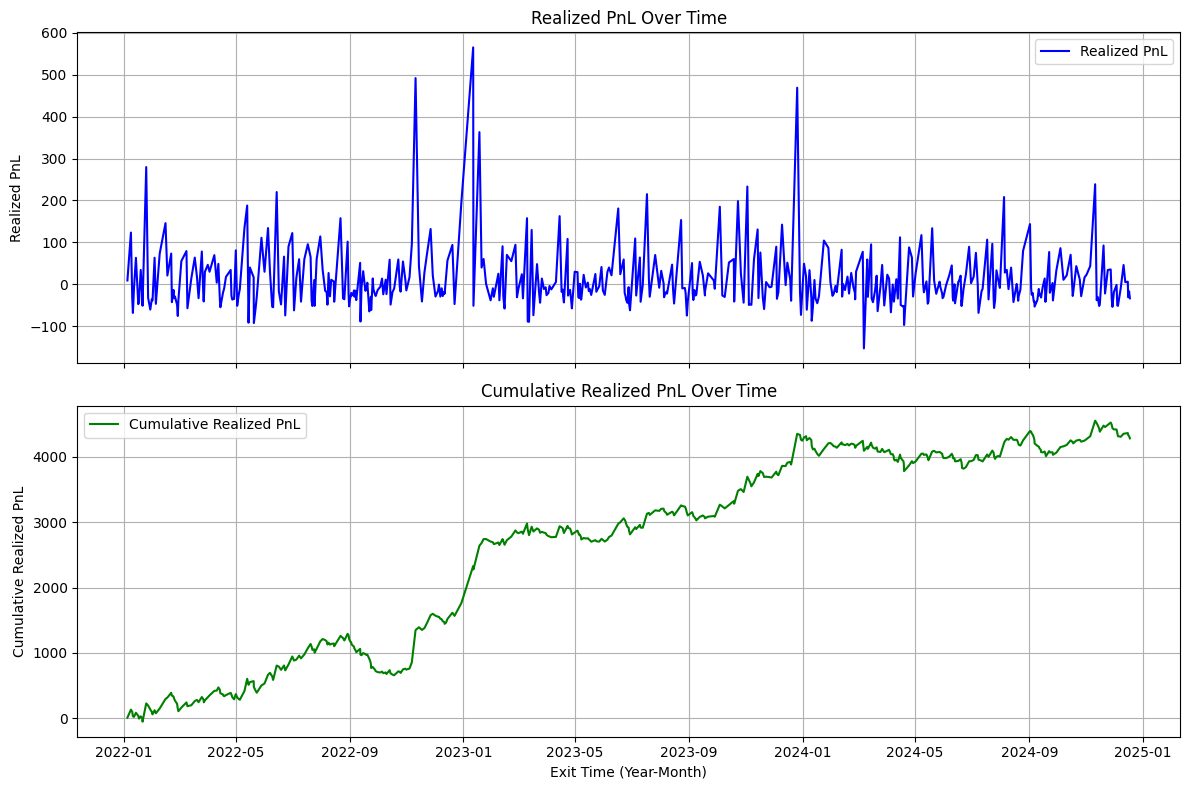

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

backtest_trade_sim_plot = backtest_trade_sim.copy()

# Convert exit_time from UNIX milliseconds to UTC+0 datetime
backtest_trade_sim_plot['exit_time_utc'] = pd.to_datetime(
    backtest_trade_sim_plot['exit_time'], unit='s', utc=True
)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Realized PnL vs Exit Time
ax[0].plot(backtest_trade_sim_plot['exit_time_utc'], backtest_trade_sim_plot['realized_pnl'], label='Realized PnL', color='blue')
ax[0].set_title('Realized PnL Over Time')
ax[0].set_ylabel('Realized PnL')

# Cumulative Realized PnL vs Exit Time
ax[1].plot(backtest_trade_sim_plot['exit_time_utc'], backtest_trade_sim_plot['cumulative_realized_pnl'], label='Cumulative Realized PnL', color='green')
ax[1].set_title('Cumulative Realized PnL Over Time')
ax[1].set_ylabel('Cumulative Realized PnL')

# Format x-axis to show year and month
ax[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
ax[1].set_xlabel('Exit Time (Year-Month)')

# Improve layout and add gridlines
for axis in ax:
    axis.grid(True)
    axis.legend()

plt.tight_layout()
plt.show()

# Compound

In [40]:
# Calculate trade simulation
backtest_trade_sim_compound = backtest_trade_recap.copy()

# Initialize columns
backtest_trade_sim_compound['balance'] = 1000  # Starting balance
backtest_trade_sim_compound['open_fee'] = 0
backtest_trade_sim_compound['exit_fee'] = 0
backtest_trade_sim_compound['realized_pnl'] = 0

# Define the taker fee (e.g., 0.001 for 0.1%)
taker_fee = 0.0005  # 0.05% futures
# taker_fee = 0.001  # 0.1% spot

# Define funding rate
funding_rate = 0.0001  # 0.01%

# Define function to calculate realized_pnl
def calculate_realized_pnl(row):
    position = row['position']
    balance = row['balance']
    open_price = row['open_price']
    exit_price = row['exit_price']
    open_fee = row['open_fee']
    exit_fee = row['exit_fee']
    funding_fee = row['funding_fee']
    
    if position == 'short':
        return balance - (balance / open_price * exit_price) - open_fee - exit_fee - funding_fee
    elif position == 'long':
        return (balance / open_price * exit_price) - balance - open_fee - exit_fee - funding_fee
    return 0  # Default case, should not be reached

# Iterative calculation for each row, starting from the first row
for i in range(len(backtest_trade_sim_compound)):
    # If it's the first row, use the initial values (balance already set to 1000)
    if i == 0:
        backtest_trade_sim_compound.loc[i, 'open_fee'] = backtest_trade_sim_compound.loc[i, 'balance'] * taker_fee
        backtest_trade_sim_compound.loc[i, 'exit_fee'] = (
            (backtest_trade_sim_compound.loc[i, 'balance'] / backtest_trade_sim_compound.loc[i, 'open_price']) *
            backtest_trade_sim_compound.loc[i, 'exit_price'] * taker_fee
        )
        backtest_trade_sim_compound.loc[i, 'hold_time'] = (backtest_trade_sim_compound.loc[i, 'exit_time'] - backtest_trade_sim_compound.loc[i, 'open_time']) / 3600
        backtest_trade_sim_compound.loc[i, 'funding_fee_occurence'] = backtest_trade_sim_compound.loc[i, 'hold_time'] // 8
        backtest_trade_sim_compound.loc[i, 'funding_fee'] = backtest_trade_sim_compound.loc[i, 'balance'] * backtest_trade_sim_compound.loc[i, 'funding_fee_occurence'] * funding_rate
        backtest_trade_sim_compound.loc[i, 'realized_pnl'] = calculate_realized_pnl(backtest_trade_sim_compound.loc[i])
        
    # For subsequent rows, update based on the previous row's balance and calculated realized_pnl
    else:
        backtest_trade_sim_compound.loc[i, 'balance'] = backtest_trade_sim_compound.loc[i - 1, 'balance'] + backtest_trade_sim_compound.loc[i - 1, 'realized_pnl']
        
        backtest_trade_sim_compound.loc[i, 'open_fee'] = backtest_trade_sim_compound.loc[i, 'balance'] * taker_fee
        backtest_trade_sim_compound.loc[i, 'exit_fee'] = (
            (backtest_trade_sim_compound.loc[i, 'balance'] / backtest_trade_sim_compound.loc[i, 'open_price']) *
            backtest_trade_sim_compound.loc[i, 'exit_price'] * taker_fee
        )
        backtest_trade_sim_compound.loc[i, 'hold_time'] = (backtest_trade_sim_compound.loc[i, 'exit_time'] - backtest_trade_sim_compound.loc[i, 'open_time']) / 3600
        backtest_trade_sim_compound.loc[i, 'funding_fee_occurence'] = backtest_trade_sim_compound.loc[i, 'hold_time'] // 8
        backtest_trade_sim_compound.loc[i, 'funding_fee'] = backtest_trade_sim_compound.loc[i, 'balance'] * backtest_trade_sim_compound.loc[i, 'funding_fee_occurence'] * funding_rate
        backtest_trade_sim_compound.loc[i, 'realized_pnl'] = calculate_realized_pnl(backtest_trade_sim_compound.loc[i])

# Calculate cumulative realized profit and loss
backtest_trade_sim_compound['cumulative_realized_pnl'] = backtest_trade_sim_compound['realized_pnl'].cumsum()

# Define trade win/loss
backtest_trade_sim_compound['win_loss'] = np.where(backtest_trade_sim_compound['realized_pnl'] >= 0, 'Win', 'Lose')

# Display the updated DataFrame
backtest_trade_sim_compound

/tmp/ipykernel_567751/978563407.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  backtest_trade_sim_compound.loc[i, 'open_fee'] = backtest_trade_sim_compound.loc[i, 'balance'] * taker_fee
/tmp/ipykernel_567751/978563407.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.49482265446224255' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  backtest_trade_sim_compound.loc[i, 'exit_fee'] = (
/tmp/ipykernel_567751/978563407.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.95986842105265' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  backtest_trade_sim_compound

,position,open_time,open_price,exit_time,exit_price,balance,open_fee,exit_fee,realized_pnl,hold_time,funding_fee_occurence,funding_fee,cumulative_realized_pnl,win_loss
0,short,1641175200,174.80,1641304800,172.99,1000.000000,0.500000,0.494823,8.959868,36.0,4.0,0.400000,8.959868,Win
1,short,1641402000,167.78,1641632400,146.79,1008.959868,0.504480,0.441367,124.472206,64.0,8.0,0.807168,133.432075,Win
2,short,1641661200,140.73,1641754800,145.20,1133.432075,0.566716,0.584717,-37.492609,26.0,3.0,0.340030,95.939466,Lose
3,long,1641758400,145.23,1641816000,135.46,1095.939466,0.547970,0.511106,-75.004964,16.0,2.0,0.219188,20.934502,Lose
4,short,1641816000,139.39,1641916800,140.49,1020.934502,0.510467,0.514496,-9.387976,28.0,3.0,0.306280,11.546526,Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,long,1733911200,222.53,1734069600,224.00,24617.253418,12.308627,12.389936,125.610716,44.0,5.0,12.308627,23742.864134,Win
489,short,1734170400,225.89,1734303600,224.21,24742.864134,12.371432,12.279423,149.470822,37.0,4.0,9.897146,23892.334956,Win
490,long,1734307200,224.21,1734343200,217.50,24892.334956,12.446167,12.073687,-771.969472,10.0,1.0,2.489233,23120.365484,Lose
491,short,1734343200,218.42,1734426000,221.85,24120.365484,12.060183,12.249572,-407.912574,23.0,2.0,4.824073,22712.452911,Lose


## Evaluation

In [41]:
import pandas as pd

# Count of positions (number and percentage)
position_counts = backtest_trade_sim_compound['position'].value_counts()
position_percentages = position_counts / len(backtest_trade_sim_compound) * 100

# Realized PnL statistics
realized_pnl_stats = {
    'max': backtest_trade_sim_compound['realized_pnl'].max(),
    'min': backtest_trade_sim_compound['realized_pnl'].min(),
    'avg': backtest_trade_sim_compound['realized_pnl'].mean(),
    'median': backtest_trade_sim_compound['realized_pnl'].median(),
}

# Win rate (overall)
total_trades = len(backtest_trade_sim_compound)
wins = (backtest_trade_sim_compound['realized_pnl'] >= 0).sum()
win_rate = wins / total_trades * 100

# Win rate per position (long/short)
win_rate_by_position = (
    backtest_trade_sim_compound.groupby('position')['realized_pnl']
    .apply(lambda x: (x >= 0).sum() / len(x) * 100)
)

# Results
results = {
    "Position Counts": position_counts.to_dict(),
    "Position Percentages": position_percentages.to_dict(),
    "Realized PnL Stats": realized_pnl_stats,
    "Overall Win Rate": win_rate,
    "Win Rate by Position": win_rate_by_position.to_dict(),
}

# Display results
results

{'Position Counts': {'long': 249, 'short': 244},
 'Position Percentages': {'long': 50.50709939148072,
  'short': 49.49290060851927},
 'Realized PnL Stats': {'max': np.float64(9889.208638151971),
  'min': np.float64(-4126.315676270289),
  'avg': np.float64(44.45491398714266),
  'median': np.float64(-40.8441125773944)},
 'Overall Win Rate': np.float64(41.37931034482759),
 'Win Rate by Position': {'long': 41.365461847389554,
  'short': 41.39344262295082}}

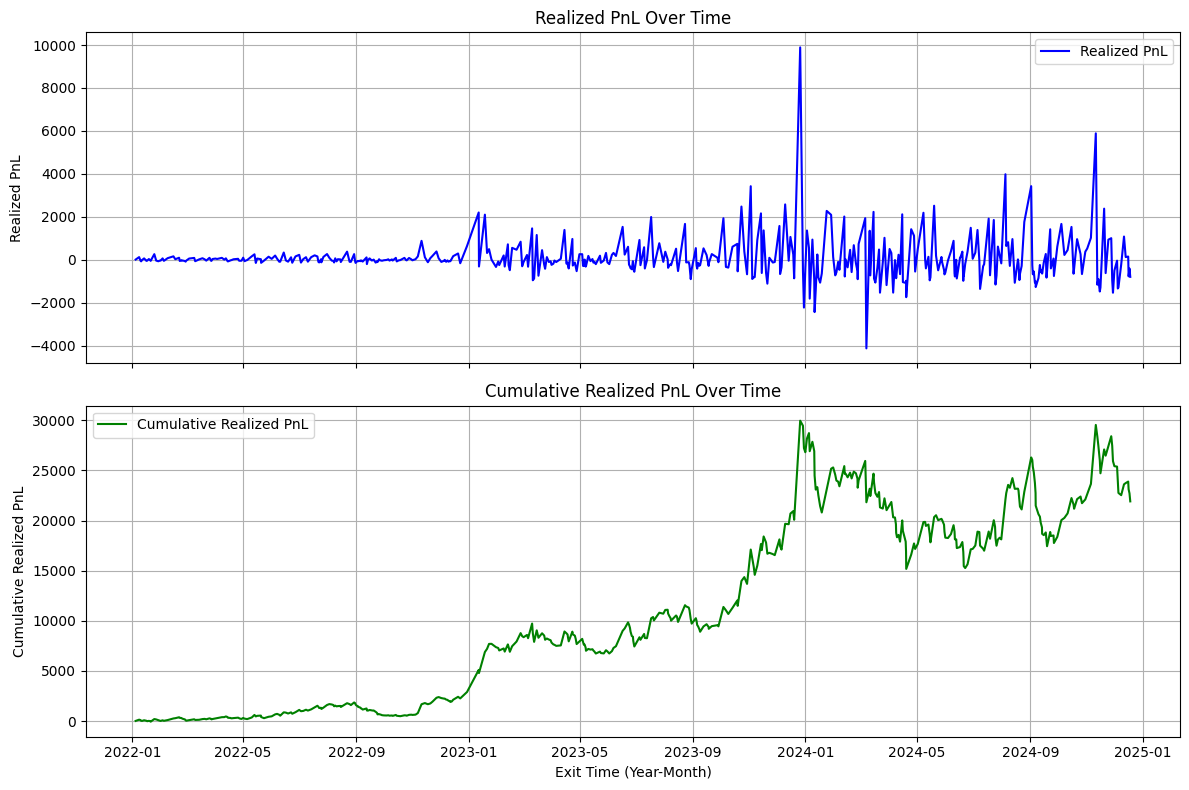

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

backtest_trade_sim_plot = backtest_trade_sim_compound.copy()

# Convert exit_time from UNIX milliseconds to UTC+0 datetime
backtest_trade_sim_plot['exit_time_utc'] = pd.to_datetime(
    backtest_trade_sim_plot['exit_time'], unit='s', utc=True
)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Realized PnL vs Exit Time
ax[0].plot(backtest_trade_sim_plot['exit_time_utc'], backtest_trade_sim_plot['realized_pnl'], label='Realized PnL', color='blue')
ax[0].set_title('Realized PnL Over Time')
ax[0].set_ylabel('Realized PnL')

# Cumulative Realized PnL vs Exit Time
ax[1].plot(backtest_trade_sim_plot['exit_time_utc'], backtest_trade_sim_plot['cumulative_realized_pnl'], label='Cumulative Realized PnL', color='green')
ax[1].set_title('Cumulative Realized PnL Over Time')
ax[1].set_ylabel('Cumulative Realized PnL')

# Format x-axis to show year and month
ax[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
ax[1].set_xlabel('Exit Time (Year-Month)')

# Improve layout and add gridlines
for axis in ax:
    axis.grid(True)
    axis.legend()

plt.tight_layout()
plt.show()

# Backtest Stats

In [15]:
backtest_trade_sim

,position,open_time,open_price,exit_time,exit_price,balance,open_fee,exit_fee,realized_pnl,hold_time,funding_fee_occurence,funding_fee,cumulative_realized_pnl,win_loss
0,short,1641175200,174.80,1641304800,172.99,1000,0.5,0.494823,8.959868,36.0,4.0,0.4,8.959868,Win
1,short,1641402000,167.78,1641632400,146.79,1000,0.5,0.437448,123.366855,64.0,8.0,0.8,132.326724,Win
2,short,1641661200,140.73,1641754800,145.20,1000,0.5,0.515881,-33.078832,26.0,3.0,0.3,99.247892,Lose
3,long,1641758400,145.23,1641816000,135.46,1000,0.5,0.466364,-68.438966,16.0,2.0,0.2,30.808926,Lose
4,short,1641816000,139.39,1641916800,140.49,1000,0.5,0.503946,-9.195473,28.0,3.0,0.3,21.613453,Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,long,1733911200,222.53,1734069600,224.00,1000,0.5,0.503303,5.102548,44.0,5.0,0.5,4358.611381,Win
489,short,1734170400,225.89,1734303600,224.21,1000,0.5,0.496281,6.040967,37.0,4.0,0.4,4364.652348,Win
490,long,1734307200,224.21,1734343200,217.50,1000,0.5,0.485036,-31.012337,10.0,1.0,0.1,4333.640011,Lose
491,short,1734343200,218.42,1734426000,221.85,1000,0.5,0.507852,-16.911542,23.0,2.0,0.2,4316.728469,Lose


In [16]:
import pandas as pd

backtest_trade_stat = backtest_trade_sim.copy()

# Convert Unix time to datetime
backtest_trade_stat['open_datetime'] = pd.to_datetime(backtest_trade_stat['open_time'], unit='s')
backtest_trade_stat['exit_datetime'] = pd.to_datetime(backtest_trade_stat['exit_time'], unit='s')

# Extract hours and days of the week
backtest_trade_stat['open_hour'] = backtest_trade_stat['open_datetime'].dt.hour
backtest_trade_stat['exit_hour'] = backtest_trade_stat['exit_datetime'].dt.hour
backtest_trade_stat['open_day'] = backtest_trade_stat['open_datetime'].dt.day_name()
backtest_trade_stat['exit_day'] = backtest_trade_stat['exit_datetime'].dt.day_name()

# Define the conditions
conditions = {
    'long_win': (backtest_trade_stat['position'] == 'long') & (backtest_trade_stat['win_loss'] == 'Win'),
    'short_win': (backtest_trade_stat['position'] == 'short') & (backtest_trade_stat['win_loss'] == 'Win'),
    'long_loss': (backtest_trade_stat['position'] == 'long') & (backtest_trade_stat['win_loss'] == 'Lose'),
    'short_loss': (backtest_trade_stat['position'] == 'short') & (backtest_trade_stat['win_loss'] == 'Lose')
}

# Initialize empty lists to hold summarized results
open_hours_df = []
exit_hours_df = []
open_days_df = []
exit_days_df = []

for name, condition in conditions.items():
    filtered_data = backtest_trade_stat[condition]
    
    # Count the open and exit hours
    open_hour_counts = filtered_data['open_hour'].value_counts().reindex(range(24), fill_value=0)
    exit_hour_counts = filtered_data['exit_hour'].value_counts().reindex(range(24), fill_value=0)
    
    # Count the open and exit days
    open_day_counts = filtered_data['open_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
    exit_day_counts = filtered_data['exit_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
    
    # Prepare a row for the open hours DataFrame
    open_hours_df.append({
        'condition': name,
        **open_hour_counts.to_dict()
    })
    
    # Prepare a row for the exit hours DataFrame
    exit_hours_df.append({
        'condition': name,
        **exit_hour_counts.to_dict()
    })
    
    # Prepare a row for the open days DataFrame
    open_days_df.append({
        'condition': name,
        **open_day_counts.to_dict()
    })
    
    # Prepare a row for the exit days DataFrame
    exit_days_df.append({
        'condition': name,
        **exit_day_counts.to_dict()
    })

# Convert the lists to DataFrames
open_hours_df = pd.DataFrame(open_hours_df)
exit_hours_df = pd.DataFrame(exit_hours_df)
open_days_df = pd.DataFrame(open_days_df)
exit_days_df = pd.DataFrame(exit_days_df)

# Set index to 'condition' for each DataFrame
open_hours_df.set_index('condition', inplace=True)
exit_hours_df.set_index('condition', inplace=True)
open_days_df.set_index('condition', inplace=True)
exit_days_df.set_index('condition', inplace=True)

# Display the results as DataFrames
open_hours_df, exit_hours_df, open_days_df, exit_days_df

(            0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  \
 condition                                           ...                       
 long_win     5   4   4   3   4   2   3   2   2   2  ...   3   4   2   8   3   
 short_win    9   2   5   1   3   3   2   3   3   6  ...   5   8   8   5   1   
 long_loss    2   5  12   7   5   3   2   4   4   5  ...   5   8   9   9   6   
 short_loss   9   7   5   5   3   4   3   3  10   4  ...   4  10  16  12   6   
 
             19  20  21  22  23  
 condition                       
 long_win     7   7   9   3   5  
 short_win    4   4   4   4   3  
 long_loss    8   7   3  10  10  
 short_loss   3   4   4   5   8  
 
 [4 rows x 24 columns],
             0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  \
 condition                                           ...                       
 long_win     7   2   6   4   1   3   2   2   4   4  ...   7  13  10   3   6   
 short_win    3   0   3   6   2   4   4   1   3 

In [17]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', 30)

In [18]:
open_hours_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
condition,,,,,,,,,,,,,,,,,,,,,,,,
long_win,5,4,4,3,4,2,3,2,2,2,8,5,5,3,3,4,2,8,3,7,7,9,3,5
short_win,9,2,5,1,3,3,2,3,3,6,4,6,5,3,5,8,8,5,1,4,4,4,4,3
long_loss,2,5,12,7,5,3,2,4,4,5,6,6,1,9,5,8,9,9,6,8,7,3,10,10
short_loss,9,7,5,5,3,4,3,3,10,4,5,6,3,4,4,10,16,12,6,3,4,4,5,8


In [19]:
exit_hours_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
condition,,,,,,,,,,,,,,,,,,,,,,,,
long_win,7,2,6,4,1,3,2,2,4,4,0,4,2,3,7,13,10,3,6,4,5,2,4,5
short_win,3,0,3,6,2,4,4,1,3,4,5,7,6,8,5,3,3,8,8,4,4,3,3,4
long_loss,9,6,7,4,4,4,4,3,3,7,3,3,6,8,11,14,11,8,4,10,3,8,3,3
short_loss,2,6,2,4,2,6,5,5,6,7,10,4,7,2,11,12,5,5,8,8,7,11,5,3


In [20]:
open_days_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
condition,,,,,,,
long_win,17,17,14,14,25,5,11
short_win,23,11,16,18,16,3,14
long_loss,26,20,27,19,17,9,28
short_loss,31,20,25,24,18,9,16


In [21]:
exit_days_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
condition,,,,,,,
long_win,17,18,18,14,11,5,20
short_win,16,17,19,7,15,5,22
long_loss,28,19,19,28,25,6,21
short_loss,24,18,22,25,23,10,21


In [22]:
# Function to calculate stats for hold_time
def calculate_hold_time_stats(condition):
    subset = backtest_trade_sim[condition]['hold_time']
    return {
        'mean': subset.mean(),
        'max': subset.max(),
        'min': subset.min(),
        'median': subset.median()
    }

# Calculate stats for each condition and create a DataFrame
hold_time_stats_df = pd.DataFrame({
    name: calculate_hold_time_stats(condition)
    for name, condition in conditions.items()
}).T  # Transpose to make conditions as rows

# Reset index for better readability
hold_time_stats_df.reset_index(inplace=True)
hold_time_stats_df.rename(columns={'index': 'condition'}, inplace=True)

# Display the DataFrame
hold_time_stats_df

,condition,mean,max,min,median
0,long_win,73.058252,282.0,12.0,68.0
1,short_win,73.603960,181.0,17.0,66.0
2,long_loss,25.500000,107.0,2.0,22.0
3,short_loss,29.223776,74.0,2.0,26.0
